In [2]:
import yt
import dash
import dash_core_components as dcc
import dash_html_components as html
import time

In [3]:
ds = yt.load("IsolatedGalaxy/galaxy0030/galaxy0030")

yt : [INFO     ] 2017-07-09 14:03:12,010 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2017-07-09 14:03:12,011 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2017-07-09 14:03:12,012 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-09 14:03:12,013 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2017-07-09 14:03:12,015 Parameters: cosmological_simulation   = 0.0


In [4]:
ad = ds.all_data()


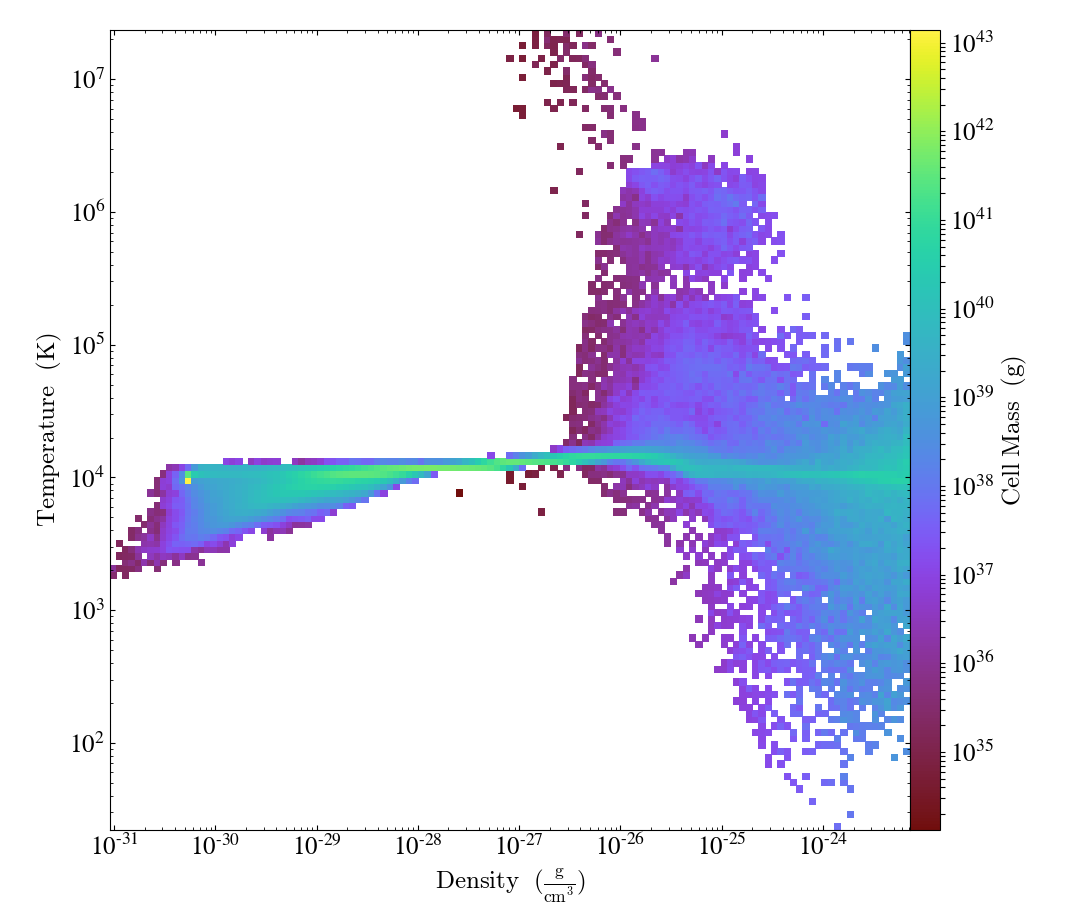

In [15]:
yt.PhasePlot(ad, "density", "temperature", "cell_mass", weight_field=None).show()

In [6]:
temp = ad["temperature"]
print(temp)

[  9336.29589844   9353.96386719   9349.01464844 ...,  11824.51855469
  11588.16699219  10173.02148438] K


In [7]:
density = ad["density"]
print(density)

[  4.92775113e-31   4.94005233e-31   4.93824694e-31 ...,   1.12879234e-25
   1.59561490e-25   1.09824903e-24] g/cm**3


In [8]:
cell_mass = ad["cell_mass"]
print(cell_mass)

[  4.41963696e+38   4.43066975e+38   4.42905051e+38 ...,   6.03437074e+36
   8.52994081e+36   5.87109032e+37] g


In [36]:
import plotly.plotly as py
from plotly.graph_objs import *

app = dash.Dash()

trace1 = {"x":density,
          "y":cell_mass,
          "z":temp,
          "type": "surface",
          "visible": True, 
          "zmin": 10,
          "zmax": 100000000,
          "xmin": 0.000000000000000000000000001,
          "xmax": 0.000000000000000000001,
          "ymin": 0.10000000000000000000000000000000,
          "ymax": 0.10000000000000000000000000000000000000000000}
    
data = Data[(trace1)]

app.layout = html.Div(children = [
    
    html.Div(children=[
        html.H2('Isolated Galazy Density',
                style={'display':'inline',
                       'float':'left',
                       'font-size':'2.65em',
                       'margin-left':'7px',
                       'font-weight':'bolder',
                       'font-family':'Product-Sans',
                       'color':"rgba(117, 117, 117, 0.95)",
                       'margin-top':'20px',
                       'margin-bottom':'0'
                      }
               ),
        html.Img(src="http://yt-project.org/img/yt_logo.svg",
                style={
                    'height': '100px',
                    'float': 'right'
                },
        ),
    ]),
    
    dcc.Graph(
        id='graph-1',
        
        figure={
            'data':data
        }
    )
])

TypeError: 'type' object is not subscriptable

In [ ]:
if __name__ == '__main__':
    app.run_server(debug=False)

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

In [1]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html

In [ ]:
app = dash.Dash()

app.layout = html.Div([
    dcc.Input(id='my-id', value='', type="text"),
    html.Div(id='my-div')
])


# this function will dynamically update the component properties, namely input and output,

# namely, the "value" property of component "my-id" and the "children" property of component "my-div".

@app.callback(
    Output(component_id='my-div', component_property='children'),
    [Input(component_id='my-id', component_property='value')]
)
def update_output_div(input_value):
    return 'You\'ve entered "{}"'.format(input_value)

if __name__ == '__main__':
    app.run_server(debug=False)
    
#Running on http://127.0.0.1:8050